In [1]:
import os
from typing import *


os.getcwd()
# Setting the baseline:
os.chdir('/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP')


curPath: str = os.getcwd() + "/src/VisualGraphStudy/"

dataPath: str = curPath + "_data/"


print("curPath = ", curPath, "\n")
print("dataPath = ", dataPath, "\n")

curPath =  /development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/VisualGraphStudy/ 

dataPath =  /development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/VisualGraphStudy/_data/ 



In [2]:
import sys
# Making files in utils folder visible here: to import my local print functions for nn.Module objects
sys.path.append(os.getcwd() + "/src/utils/")
# For being able to import files within CausalNex folder
sys.path.append(curPath)
sys.path.append(curPath + 'fonts/')

sys.path



['/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/VisualGraphStudy',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python37.zip',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/lib-dynload',
 '',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/site-packages',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/site-packages/IPython/extensions',
 '/home/statisticallyfit/.ipython',
 '/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/utils/',
 '/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/VisualGraphStudy/',
 '/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/VisualGraphStudy/fonts/']

Fitting node states, using the input data:

In [3]:
import pandas as pd
from pandas.core.frame import DataFrame

from src.utils.DataUtil import *

CPD_workCapacity: DataFrame = pd.read_csv(dataPath + 'cpd_workcapacity.csv', delimiter =',') #, keep_default_na=False)
#inputData.columns # see column names
CPD_workCapacity = cleanData(CPD_workCapacity.dropna())  # remove the NA rows (which are the empty ones) and clean the whitespaces

CPD_workCapacity

,Time,ExertionLevel,ExperienceLevel,TrainingLevel,Low,High
0,1,Low,Low,Low,0.014,99.986
1,1,Low,Low,High,20.000,80.000
2,1,Low,High,Low,15.000,85.000
3,1,Low,High,High,2.000,98.000
4,1,High,Low,Low,90.000,10.000
5,1,High,Low,High,60.000,40.000
6,1,High,High,Low,19.000,81.000
7,1,High,High,High,11.000,89.000
8,2,Low,Low,Low,31.000,69.000
9,2,Low,Low,High,21.000,79.000


In [4]:
res = CPD_workCapacity.to_dict(orient='split')
colnames = res['columns']; colnames
data = res['data']; data

import numpy

datacols = numpy.asarray(data).T; datacols

strtable = str(CPD_workCapacity)
print(strtable)

    Time ExertionLevel ExperienceLevel TrainingLevel     Low    High
0      1           Low             Low           Low   0.014  99.986
1      1           Low             Low          High  20.000  80.000
2      1           Low            High           Low  15.000  85.000
3      1           Low            High          High   2.000  98.000
4      1          High             Low           Low  90.000  10.000
5      1          High             Low          High  60.000  40.000
6      1          High            High           Low  19.000  81.000
7      1          High            High          High  11.000  89.000
8      2           Low             Low           Low  31.000  69.000
9      2           Low             Low          High  21.000  79.000
10     2           Low            High           Low  15.000  85.000
11     2           Low            High          High   2.000  98.000
12     2          High             Low           Low  90.000  10.000
13     2          High            

In [5]:
CPD_exertionLevel: DataFrame = cleanData(pd.read_csv(dataPath + 'cpd_exertion_experience_training.csv', delimiter =',').dropna())
CPD_experienceLevel = CPD_exertionLevel.copy()
CPD_trainingLevel = CPD_exertionLevel.copy()

CPD_exertionLevel

,Low,High
0,50,50


In [6]:
CPD_injuryType: DataFrame = cleanData(pd.read_csv(dataPath + 'cpd_injurytype.csv', delimiter =',').dropna())

CPD_injuryType

,ProcessType,UsesOp,Chemical-Burn,Electrical-Burn,Electrical-Shock,Contact-Contusion,FallGtm
0,Accel-Pedal,Forklift,20.0,20.0,20,20.0,20.0
1,Accel-Pedal,Front-Right-Door,20.0,20.0,20,20.0,20.0
2,Accel-Pedal,Oil,20.0,20.0,20,20.0,20.0
3,Accel-Pedal,Power-Gun,1.0,40.0,57,1.0,1.0
4,Door-Mount,Forklift,1.0,8.0,1,80.0,10.0
5,Door-Mount,Front-Right-Door,1.0,7.0,2,75.0,15.0
6,Door-Mount,Oil,43.0,33.0,22,1.0,1.0
7,Door-Mount,Power-Gun,2.5,2.5,90,2.5,2.5
8,Engine-Mount,Forklift,1.0,8.0,1,80.0,10.0
9,Engine-Mount,Front-Right-Door,1.0,8.0,1,80.0,10.0


In [7]:
CPD_processType: DataFrame = cleanData(pd.read_csv(dataPath + 'cpd_processtype.csv', delimiter =',').dropna())
CPD_processType

,Accel-Pedal,Door-Mount,Engine-Mount,Engine-Wiring,Oil-Fill,Sun-Roof-Housing
0,16.667,16.667,16.667,16.667,16.667,16.667


In [8]:
CPD_time: DataFrame = cleanData(pd.read_csv(dataPath + 'cpd_time.csv', delimiter =',').dropna())

CPD_time

,1,2,3,4,5
0,20,20,20,20,20


In [9]:
CPD_usesop: DataFrame = cleanData(pd.read_csv(dataPath + 'cpd_usesop.csv', delimiter =',').dropna())

CPD_usesop

,ProcessType,Forklift,Front-Right-Door,Oil,Power-Gun
0,Accel-Pedal,1,7,2,90
1,Door-Mount,4,90,1,5
2,Engine-Mount,95,1,1,3
3,Engine-Wiring,1,1,1,97
4,Oil-Fill,0,0,100,0
5,Sun-Roof-Housing,94,1,3,2


In [10]:
CPD_absentee: DataFrame = cleanData(pd.read_csv(dataPath + 'cpd_absentee.csv', delimiter =',').dropna())
CPD_absentee






,Time,ProcessType,InjuryType,WorkCapacity,Low,High
0,1,Accel-Pedal,Chemical-Burn,Low,70.0,30.0
1,1,Accel-Pedal,Chemical-Burn,High,90.0,10.0
2,1,Accel-Pedal,Electrical-Burn,Low,60.0,40.0
3,1,Accel-Pedal,Electrical-Burn,High,80.0,20.0
4,1,Accel-Pedal,Electrical-Shock,Low,70.0,30.0
...,...,...,...,...,...,...
295,5,Sun-Roof-Housing,Electrical-Shock,High,94.0,6.0
296,5,Sun-Roof-Housing,Contact-Contusion,Low,1.0,99.0
297,5,Sun-Roof-Housing,Contact-Contusion,High,2.0,98.0
298,5,Sun-Roof-Housing,FallGtm,Low,1.0,99.0


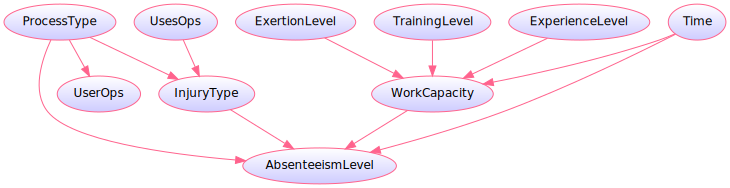

In [11]:
# Build model now with pgmpy
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

from src.utils.GraphvizUtil import *

# Defining mdoel structure, just by passing a list of edges.
carModel: BayesianModel = BayesianModel([('Time', 'WorkCapacity'), ('TrainingLevel', 'WorkCapacity'),
                                         ('ExperienceLevel', 'WorkCapacity'), ('ExertionLevel', 'WorkCapacity'),
                                         ('Time', 'AbsenteeismLevel'),
                                         ('ProcessType', 'UserOps'), ('ProcessType', 'InjuryType'), ('ProcessType',
                                                                                                     'AbsenteeismLevel'),
                                         ('UsesOps', 'InjuryType'), ('InjuryType', 'AbsenteeismLevel'),
                                         ('WorkCapacity', 'AbsenteeismLevel')])
#model: BayesianModel = BayesianModel([('Difficulty', 'Grade'), ('Intelligence', 'Grade'), ('Grade', 'Letter'), ('Intelligence', 'SAT')])

pgmpyToGraph(model  = carModel)

In [12]:
# Next: convert the DataFrames (pandas) into TabularCPDS (pgmpy)

CPD_injuryType
CPD_injuryType.get_values()

# Defining individual CPDs with state names
cpd_Time = TabularCPD(variable ='Time', variable_card = 2, values = [[0.6, 0.4]],
                      state_names = {'Time' : ['Easy', 'Hard']})

cpdState_I = TabularCPD(variable = 'I', variable_card=2, values = [[0.7, 0.3]],
                        state_names = {'I' : ['Dumb', 'Intelligent']})

cpdState_G = TabularCPD(variable = 'G', variable_card = 3, values = [[0.3, 0.05, 0.9, 0.5],
                                                                     [0.4, 0.25, 0.08, 0.3],
                                                                     [0.3, 0.7, 0.02, 0.2]],
                        evidence = ['I', 'D'], evidence_card = [2,2],
                        state_names = {'G': ['A', 'B', 'C'], 'I' : ['Dumb', 'Intelligent'], 'D':['Easy', 'Hard']})

cpdState_L = TabularCPD(variable = 'L', variable_card = 2, values = [[0.1, 0.4, 0.99],
                                                                     [0.9, 0.6, 0.01]],
                        evidence = ['G'], evidence_card = [3],
                        state_names = {'L' : ['Bad', 'Good'], 'G': ['A', 'B', 'C']})

cpdState_S = TabularCPD(variable = 'S', variable_card = 2, values = [[0.95, 0.2],
                                                                     [0.05, 0.8]],
                        evidence = ['I'], evidence_card = [2],
                        state_names={'S': ['Bad', 'Good'], 'I': ['Dumb', 'Intelligent']})

# Associating the CPDs with the network:
#carModel.add_cpds(cpd_Time, cpdState_I, cpdState_G, cpdState_L, cpdState_S)
#assert carModel.check_model()

/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
  after removing the cwd from sys.path.


In [13]:
#pgmpyToGraph(carModel)

In [14]:
#pgmpyToGrid(carModel, 'AbsenteeismLevel') # assert it is the same as CPD_absenteeism.get_values()

In [15]:

#pgmpyToGraphCPD(carModel)